Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘simr’


The following object is masked from ‘package:lme4’:

    getData



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


In case you would like cite this package, cite it as:
     Patil, I. (2018). ggstatsplot: "ggplot2" Based Plots with Statistical Details. CRAN.
     Retrieved from https://cran.r-project.org/web/packages/ggstatsplot/index.html

This is rstantools version 2.1.1

Loading required package: ggplot2

Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate




[1] 54 13

'data.frame':	54 obs. of  13 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NDR    : num  12.9 18.7 35.6 24.1 27 ...
 $ SUBJECT: Factor w/ 27 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ GROUP  : Factor w/ 4 levels "Anti-Phase","In-Phase",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ V1pV5a : num  0.5213 0.5365 -0.0104 -0.4367 0.1782 ...
 $ V1aV5p : num  0.919 0.331 0.586 -0.203 -0.294 ...
 $ PSIT   : num  0.00059 0.001163 -0.000431 0.000468 -0.001233 ...
 $ PSIA   : num  -0.003315 -0.001511 0.000769 0.000837 0.010853 ...
 $ PSIB   : num  -8.42e-03 -4.52e-02 7.68e-04 -6.67e-05 6.05e-05 ...
 $ PSIG   : num  -0.00686 -0.002995 -0.000884 -0.000591 0.000195 ...
 $ ITPCA  : num  0.201 0.226 0.176 0.159 0.191 ...
 $ ITPCB  : num  0.1255 0.479 0.0879 0.1119 0.338 ...
 $ ITPCG  : num  0.0914 0.1994 0.0709 0.0826 0.1124 ...


[1] "Anti-Phase" "In-Phase"   "Sham_AnP"   "Sham_InP"

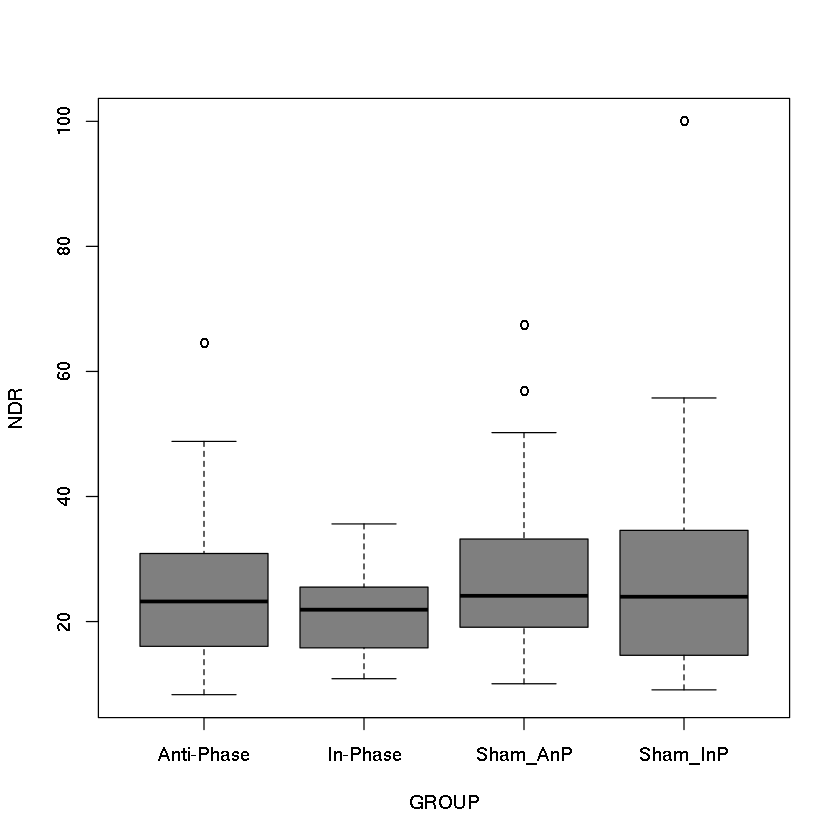

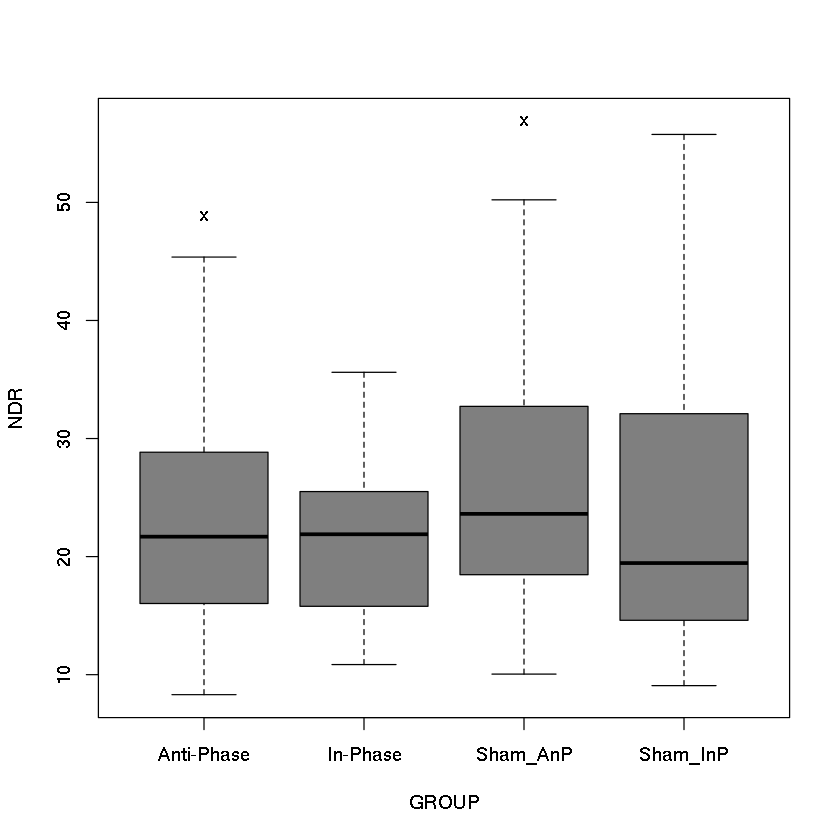

In [1]:
# update.packages(ask=FALSE)
# install.packages("broom")
library(simr)
library(Matrix)
library(lme4)
library(emmeans)
library(lattice)## LOADING AND INSPECTING THE DATA
library(lmerTest) ## INFERENTIAL TESTS
library(mice)
library(ggstatsplot)
library(rstantools)
library(ggpubr)
library(sjPlot)
library(ggplot2)
library(Rmisc)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('III_Mixed_mod_All.txt',header=TRUE,sep='\t')
# ndr[]
dim(ndr)

## TURN NUMERICAL VALUES INTO FACTOR/CATEGORICAL VARIABLES
ndr$GROUP <- factor(ndr$GROUP)
ndr$SUBJECT <- factor(ndr$SUBJECT)
str(ndr)
levels(ndr$GROUP)

## SIMPLE BOX PLOTS
plot(NDR~GROUP,data=ndr,col="grey50",pch="o")
# xyplot(NDR~GROUP,groups=GROUP,data=ndr,pch="+",cex=1.5)
# options(repr.plot.width = 8, repr.plot.height = 6)

## LOCATE OUTLIERS
# boxplot.stats(ndr$NDR) 
outliers <- boxplot(ndr$NDR, plot=FALSE)$out # Identify the values outside the Upper and Lower whiskers
prepro <- ndr
prepro <- prepro[-which(prepro$NDR %in% outliers),] # Get the index position of those values and remove them from the Dataset

plot(NDR~GROUP,data=prepro,col="grey50",pch="x")


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + GROUP + (1 | SUBJECT)
   Data: try1

REML criterion at convergence: 345.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5896 -0.4233 -0.0788  0.3996  2.2218 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 117.79   10.853  
 Residual              20.41    4.518  
Number of obs: 51, groups:  SUBJECT, 26

Fixed effects:
              Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    24.6450     3.1420 27.7763   7.844 1.61e-08 ***
GROUPIn-Phase  -3.3844     4.6249 27.7763  -0.732    0.470    
GROUPSham_AnP   1.9748     1.7077 23.1409   1.156    0.259    
GROUPSham_InP   0.2854     4.6557 28.3952   0.061    0.952    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GROUPI GROUPS_A
GROUPIn-Phs -0.679                
GROUPShm_AP -0.272  0.185         
GROUPShm

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GROUP,109.2027,36.4009,3,23.69146,1.783099,0.1776322


$`simple contrasts for GROUP`
 contrast                  estimate   SE   df t.ratio p.value
 (Anti-Phase) - (In-Phase)    3.384 4.62 27.6  0.732  0.4705 
 (Anti-Phase) - Sham_AnP     -1.975 1.71 23.0 -1.156  0.2594 
 (Anti-Phase) - Sham_InP     -0.285 4.66 28.3 -0.061  0.9516 
 (In-Phase) - Sham_AnP       -5.359 4.62 27.6 -1.159  0.2565 
 (In-Phase) - Sham_InP       -3.670 1.92 23.3 -1.909  0.0687 
 Sham_AnP - Sham_InP          1.689 4.66 28.3  0.363  0.7195 

Degrees-of-freedom method: kenward-roger 


,contrast,estimate,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Anti-Phase) - (In-Phase),3.3843915,4.624872,27.64499,-6.094712,12.8634953
2,(Anti-Phase) - Sham_AnP,-1.9748016,1.707731,23.00526,-5.507467,1.5578638
3,(Anti-Phase) - Sham_InP,-0.2854245,4.656459,28.26520,-9.819719,9.2488699
4,(In-Phase) - Sham_AnP,-5.3591931,4.624872,27.64499,-14.838297,4.1199106
5,(In-Phase) - Sham_InP,-3.6698160,1.922389,23.27145,-7.644015,0.3043829
6,Sham_AnP - Sham_InP,1.6893771,4.656459,28.26520,-7.844917,11.2236715


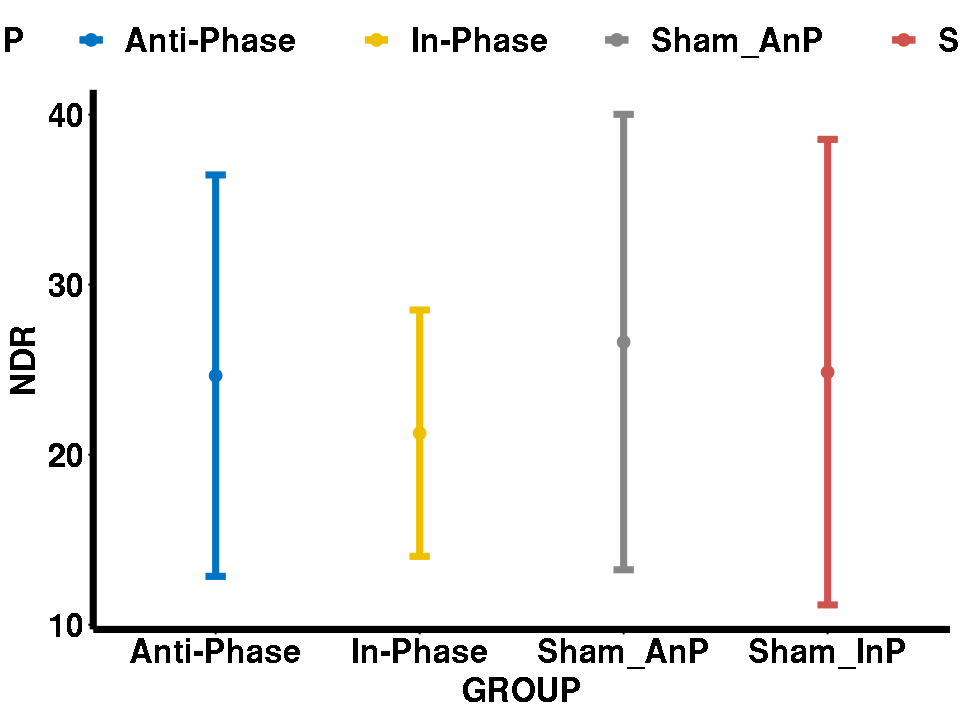

In [2]:
### All 4 groups evaluated individually

try1 <- prepro

# SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(try1, x = "GROUP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+

# RANDOM INTERCEPT MODEL
mlm1 <- lmer(NDR ~ 1 + GROUP + (1|SUBJECT), data=try1, REML=TRUE)#, na.action="na.fail")
summary(mlm1)
anova(mlm1)
emm = emmeans(mlm1, ~ GROUP, ddf="Kenward-Roger")
pairs(emm, simple='each', adjust="none")
confint(pairs(emm, simple='each', adjust="none"))


[1] "Anti-Phase" "In-Phase"   "Sham_AnP"   "Sham_InP"

[1] "AnP"  "InP"  "Sham"

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + GROUP + (1 | SUBJECT)
   Data: try2

REML criterion at convergence: 350.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6274 -0.4334 -0.1170  0.4125  2.2044 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 113.76   10.67   
 Residual              20.34    4.51   
Number of obs: 51, groups:  SUBJECT, 26

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   25.851      2.284 29.541  11.317 2.91e-12 ***
GROUPAnP      -1.858      1.675 24.855  -1.109   0.2779    
GROUPInP      -3.828      1.868 25.921  -2.050   0.0507 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr) GROUPA
GROUPAnP -0.207       
GROUPInP -0.211  0.044

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,7.890198,14.3723782
.sigma,3.365202,5.8773524
(Intercept),21.332050,30.3680689
GROUPAnP,-5.121185,1.4288694
GROUPInP,-7.490331,-0.1939913


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GROUP,106.6536,53.32678,2,25.37044,2.621218,0.09229727


$`simple contrasts for GROUP`
 contrast   estimate   SE   df t.ratio p.value
 Sham - AnP     1.86 1.68 24.6 1.104   0.2804 
 Sham - InP     3.83 1.88 25.6 2.033   0.0525 
 AnP - InP      1.97 2.49 27.4 0.792   0.4349 

Degrees-of-freedom method: kenward-roger 


,contrast,estimate,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sham - AnP,1.858095,1.683520,24.57777,-1.61220288,5.328393
2,Sham - InP,3.828480,1.883070,25.64492,-0.04483591,7.701795
3,AnP - InP,1.970385,2.486339,27.42708,-3.12744685,7.068216


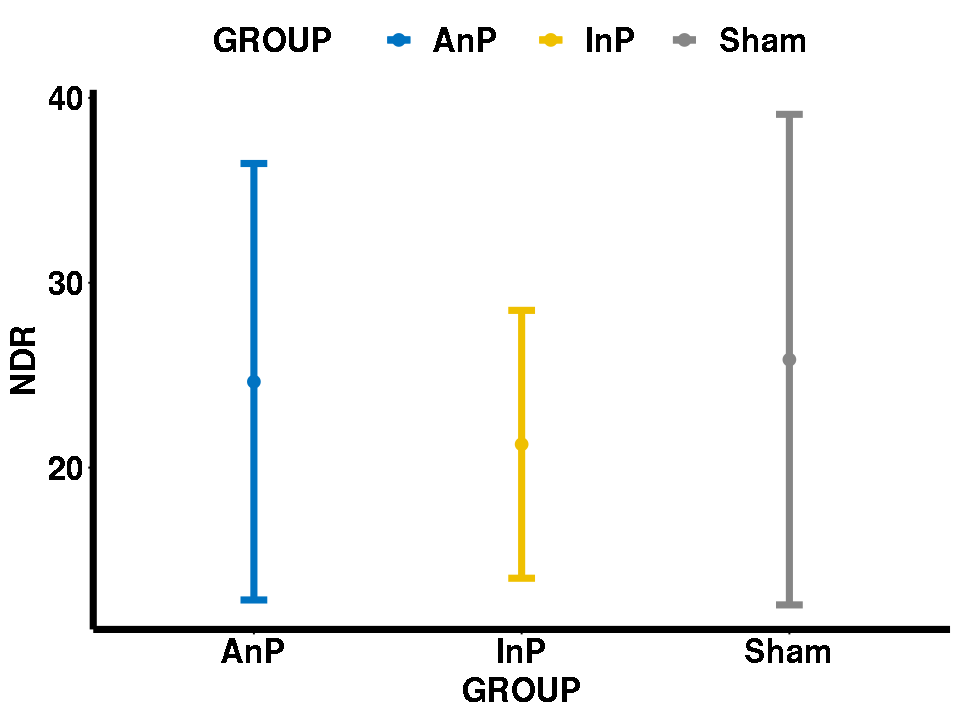

In [24]:
### Grouping 2 Sham groups in a single one 

try2 <- prepro

# try2[]
levels(try2$GROUP)
levels(try2$GROUP) <- c('AnP','InP','Sham','Sham')
# try2[]
levels(try2$GROUP)

# SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(try2, x = "GROUP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+

# CHANGE INTERCEPT (label) TO SHAM
try2$GROUP <- relevel(try2$GROUP,"Sham")   

# MODEL GROUP DIFFERENCES ACROSS TIMEP
mlm2 <- lmer(NDR ~ 1 + GROUP + (1|SUBJECT), data=try2, REML=TRUE)
summary(mlm2)
confint(mlm2)
anova(mlm2, type=2)
emm2 = emmeans(mlm2, ~ GROUP, ddf="Kenward-Roger")
pairs(emm2, simple='each', adjust="none")
confint(pairs(emm2, simple='each', adjust="none"))


[1] "Anti-Phase" "In-Phase"   "Sham_AnP"   "Sham_InP"

[1] "Verum" "Sham"

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + GROUP + (1 | SUBJECT)
   Data: try3

REML criterion at convergence: 354.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.56914 -0.42183 -0.02864  0.39755  2.33044 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 114.58   10.704  
 Residual              19.94    4.465  
Number of obs: 51, groups:  SUBJECT, 26

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   25.814      2.287 29.479  11.287 3.19e-12 ***
GROUPVerum    -2.731      1.261 24.270  -2.166   0.0404 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GROUPVerum -0.286

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,7.918779,14.4292261
.sigma,3.396713,5.9310021
(Intercept),21.275769,30.3519809
GROUPVerum,-5.249184,-0.2149996


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GROUP,93.52283,93.52283,1,24.26967,4.690316,0.04037552


$`simple contrasts for GROUP`
 contrast     estimate   SE   df t.ratio p.value
 Sham - Verum     2.73 1.26 24.1 2.165   0.0405 

Degrees-of-freedom method: kenward-roger 


,contrast,estimate,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sham - Verum,2.731392,1.261704,24.13307,0.1281211,5.334662


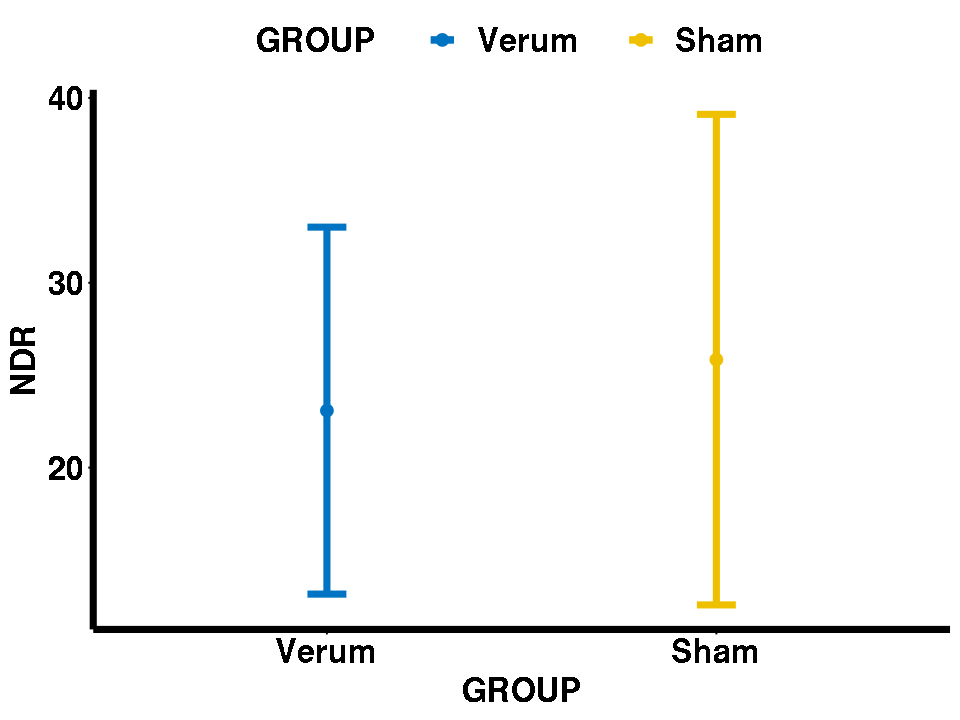

In [7]:
### Grouping 2 Verum and 2 Sham groups in a single one 

try3 <- prepro

# try3[]
levels(try3$GROUP)
levels(try3$GROUP) <- c('Verum','Verum','Sham','Sham')
# try3[]
levels(try3$GROUP)

# SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(try3, x = "GROUP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+

# CHANGE INTERCEPT TO SHAM
try3$GROUP <- relevel(try3$GROUP,"Sham")

# MODEL GROUP DIFFERENCES ACROSS TIMEP
mlm3 <- lmer(NDR ~ 1 + GROUP + (1|SUBJECT), data=try3, REML=TRUE)
summary(mlm3)
confint(mlm3)
anova(mlm3, type=2)
emm3 = emmeans(mlm3, ~ GROUP, ddf="Kenward-Roger")
pairs(emm3, simple='each', adjust="none")
confint(pairs(emm3, simple='each', adjust="none"))

In [56]:
## ADDING EEG FACTOR TO THE MODEL

# CHANGE INTERCEPT TO SHAM
# try2$GROUP <- relevel(try2$GROUP,"Sham")

mlm4 <- lmer(NDR ~ 1 + GROUP*PSIG + (1|SUBJECT), data=try3, REML=TRUE)#, na.action="na.fail")
summary(mlm4)
confint(mlm4)
anova(mlm4, type=2)
emm4 = emmeans(mlm4, ~ GROUP, ddf="Kenward-Roger")
pairs(emm4, simple='each', adjust="none")
confint(pairs(emm4, simple='each', adjust="none"))
# plot(mlm4, id=0.05) ## Residuals plotted as white noise mean that they have dist. close to N, mean 0 and constant variance
# ndr$GROUP <- relevel(ndr$GROUP,"Sham")   # changed the intercept to GROUP:SHAM
# mlm3 <- lmer(NDR ~ 1 + TIMEP+GROUP+V1pV5a + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
# summary(mlm3)
# confint(mlm3)
# anova(mlm3, type=2)

## COMPARING RANDOM EFFECTS BY INFORMATION CRITERIA
# AIC(rint) ; BIC(rint)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + GROUP * PSIG + (1 | SUBJECT)
   Data: try3

REML criterion at convergence: 322.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.27189 -0.49685 -0.05624  0.49164  2.04414 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 100.79   10.040  
 Residual              18.87    4.344  
Number of obs: 51, groups:  SUBJECT, 26

Fixed effects:
                Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       25.915      2.158   28.934  12.007 9.22e-13 ***
GROUPVerum        -2.851      1.237   21.795  -2.306   0.0310 *  
PSIG             680.766    270.155   25.867   2.520   0.0183 *  
GROUPVerum:PSIG -645.857    432.884   27.125  -1.492   0.1472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GROUPVr PSIG  
GROUPVerum  -0.291               
PSIG         

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,7.376607,13.6040640
.sigma,3.161411,5.5763289
(Intercept),21.645354,30.1705082
GROUPVerum,-5.223059,-0.4775645
PSIG,157.692824,1225.8431619
GROUPVerum:PSIG,-1511.152417,191.1859919


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GROUP,100.33199,100.33199,1,21.79466,5.316734,0.03102365
PSIG,84.16747,84.16747,1,24.32764,4.460153,0.04514631
GROUP:PSIG,42.00730,42.00730,1,27.12468,2.226026,0.14724267


NOTE: Results may be misleading due to involvement in interactions



$`simple contrasts for GROUP`
 contrast     estimate   SE   df t.ratio p.value
 Sham - Verum     2.99 1.23 22.2 2.425   0.0239 

Degrees-of-freedom method: kenward-roger 


,contrast,estimate,SE,df,lower.CL,upper.CL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Sham - Verum,2.991623,1.233682,22.15779,0.4341788,5.549067


[1] "Anti-Phase" "In-Phase"   "Sham_AnP"   "Sham_InP"

[1] "AnP"  "InP"  "Sham"

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?




Call:
lm(formula = NDR ~ 1 + GROUP * V1pV5a, data = try4)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1167  -7.9485   0.4665   3.9915  20.8399 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       20.330      3.165   6.424 1.83e-06 ***
GROUPAnP           5.091      4.221   1.206    0.241    
V1pV5a            -4.789      6.468  -0.740    0.467    
GROUPAnP:V1pV5a    1.089      7.407   0.147    0.884    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.06 on 22 degrees of freedom
Multiple R-squared:  0.09575,	Adjusted R-squared:  -0.02756 
F-statistic: 0.7765 on 3 and 22 DF,  p-value: 0.5196


,2.5 %,97.5 %
(Intercept),13.767417,26.893493
GROUPAnP,-3.663669,13.845604
V1pV5a,-18.202938,8.624777
GROUPAnP:V1pV5a,-14.272638,16.451200


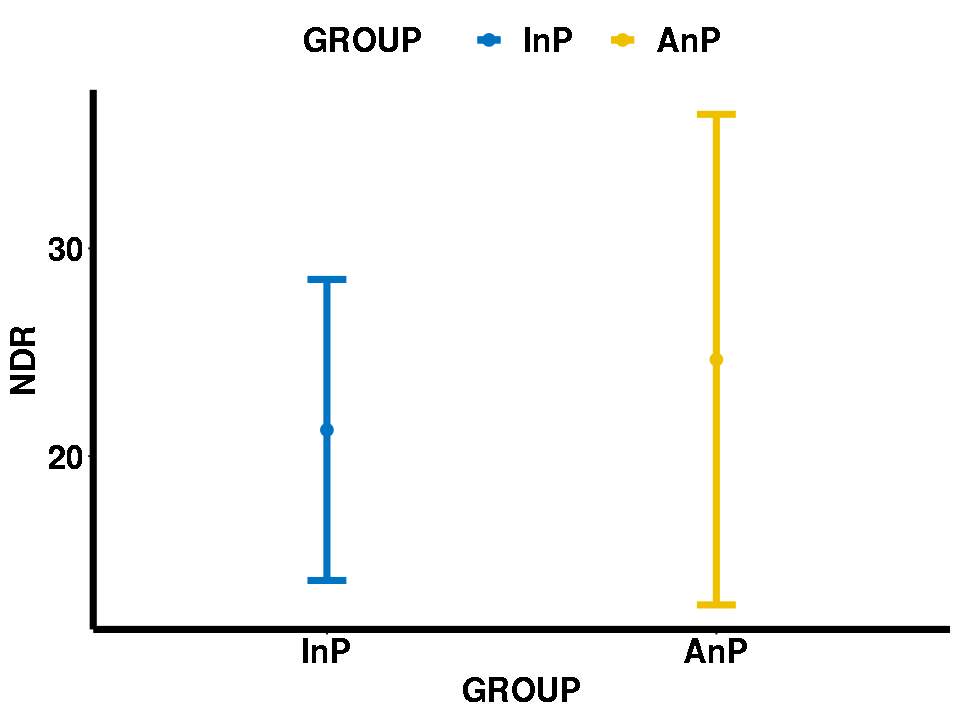

In [7]:
## Compare In-Phase vs. Anti-Phase

try4 <- prepro

levels(try4$GROUP)
levels(try4$GROUP) <- c('AnP','InP','Sham','Sham')
levels(try4$GROUP)

# DROP ALL DATA FROM SHAM
try4 <- try4[!(try4$GROUP=="Sham"),] 
# try4[]

# CHANGE INTERCEPT TO InP
try4$GROUP <- relevel(try4$GROUP,"InP")

# SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(try4, x = "GROUP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+

# MODEL GROUP DIFFERENCES ACROSS TIMEP
mlm5 <- lm(NDR ~ 1 + GROUP*V1pV5a , data=try4)
summary(mlm5)
confint(mlm5)
# anova(mlm5, type=2)
# emm5 = emmeans(mlm5, ~ GROUP, ddf="Kenward-Roger")
# pairs(emm5, simple='each', adjust="none")
# confint(pairs(emm5, simple='each', adjust="none"))



Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


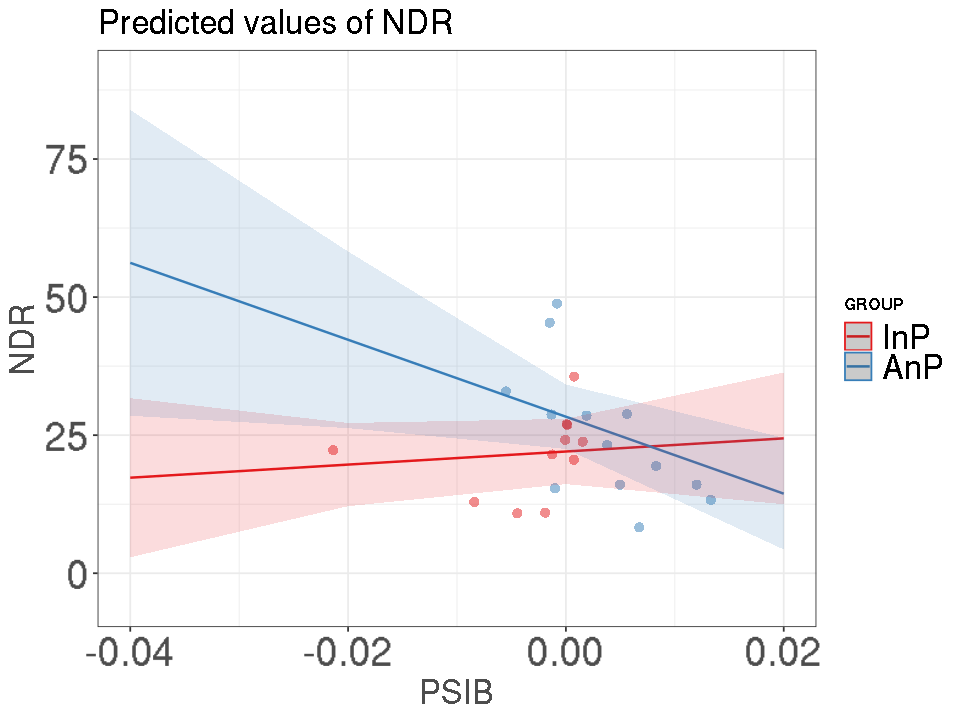

In [74]:
# install.packages('effects')
library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)
plot_model(mlm5, type = "pred", show.data = T, terms = c('PSIB','GROUP'), axis.lim= list(c(-0.04,0.02), c(-5, 90)))
ggsave('PSIB_2VerGroups.png', plot = last_plot(), scale = 1, width = 20, height = 10, units = c('cm'), dpi = 300, limitsize = TRUE)


In [23]:
# install.packages("scatterplot3d") # Install
# install.packages(c("rgl", "car"))
library("scatterplot3d") # load
library("car")
library("rgl")
library("RColorBrewer")

x <- try3$PSIT
z <- try3$PSIG
y <- try3$NDR

# shapes = c(15, 16) 
# shapes <- shapes[as.numeric(try3$GROUP)]
# colors <- c("#E69F00", "#56B4E9")
# colors <- colors[as.numeric(try3$GROUP)]

# s3d <- scatterplot3d(x, y, z, colors, shapes, angle = 45,
#               main="Interaction Planes",
#               xlab = "PSIT",
#               ylab = "PSIG",
#               zlab = "NDR")#, type="h")
# legend("bottom", legend = levels(try3$GROUP),
#       col =  c("#E69F00", "#56B4E9"), 
#       pch = c(15, 16), 
#       inset = -0.2, xpd = TRUE, horiz = TRUE)

# my.lm3 <- lm(NDR ~ PSIT+PSIG, data=try3)
# s3d$plane3d(my.lm3)

colors <- brewer.pal(n=3, name="Set1")
scatter3d(x, y, z, groups=try3$GROUP, 
          surface=TRUE, ellipsoid = FALSE, fit = 'lin',
          xlab = "PSIT", ylab = "NDR", zlab = "PSIG",
          surface.col = colors, point.col = colors, parallel=FALSE,
          axis.col = c("black", "black", "black"), axis.ticks=FALSE, surface.alpha=1)
rglwidget()
# rgl.postscript("plot.pdf",fmt="pdf")


HTML widgets cannot be represented in plain text (need html)

In [1]:
### Difference between Verum groups

library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')

ndr$GROUP <- relevel(ndr$GROUP,"aV1-gV5")   # changed the intercept to GROUP
ndr$TIMEP <- relevel(ndr$TIMEP,"Bsl")   # changed the intercept to GROUP
ndr <- ndr[!(ndr$GROUP=="Sham"),] # drop all data from Sham

mlm4 <- lmer(NDR ~ 1 + TIMEP+GROUP*V1aV5p + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
summary(mlm4)
confint(mlm4)
anova(mlm4, type=2)
plot_model(mlm4, type = "pred", terms = c("V1aV5p", "GROUP"))

Learn more about sjPlot with 'browseVignettes("sjPlot")'.



ERROR: Error in lmer(NDR ~ 1 + TIMEP + GROUP * WPLIG + (1 | SUBJECT), data = ndr, : could not find function "lmer"


Loading required package: lattice

Loading required package: plyr

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




[1] "aV1-gV5" "gV1-aV5" "Sham"

[1] "Bsl"  "TP0"  "TP10" "TP30"

[1] 72 23

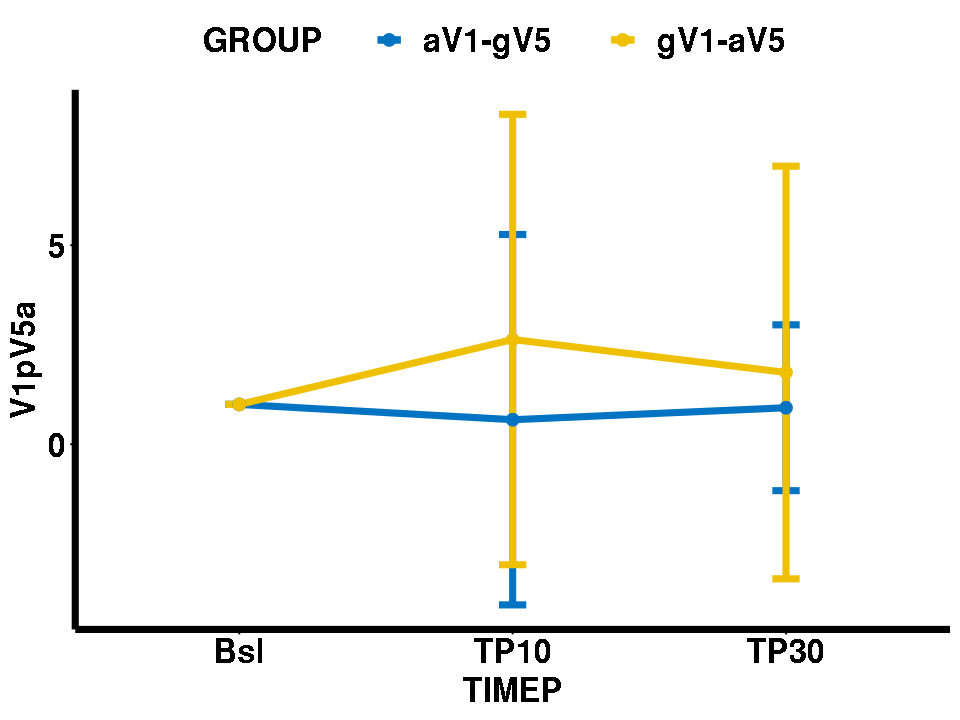

In [1]:
### Grouping 2 Verum groups in a single one 

# install.packages('Rmisc')
library(sjPlot)
library(ggplot2)
library(Rmisc)
library(lmerTest) 
library(emmeans)
library(ggpubr)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')
ndr <- ndr[!(ndr$TIMEP=="TP0"),] # drop all data from TP0
ndr <- ndr[!(ndr$GROUP=="Sham"),] # drop all data from Sham
# levels(ndr$GROUP) <- c("Verum", "Verum", "Sham")
levels(ndr$GROUP)
levels(ndr$TIMEP)
dim(ndr)

## SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(ndr, x = "TIMEP", y = "V1pV5a", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+
# stat_compare_means(aes(group= GROUP), size=7, label = "p.signif")